# Test 1: Fitting a straight line to some data

This is a very simple test case to introduce the interface.

First we import the required python modules.

In [1]:
import os
import sys

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

sys.path.append(os.path.abspath('../Code'))
from Adaptive_Sampler import Adaptive_Sampler




Next we define the model we are going to fit (a two-coefficent polynomial) and a function that can compute the natural log of the posterior probability given data 
$D = (\underline{x},\underline{y},\underline{\sigma})$. In this case
$p(\theta|D) = e^{-\chi^2/2}$ where  $\chi^2 = \Sigma_{i=1}^N \frac{(y_i - model(x_i))^2}{\sigma^2}$ for $N$ data points.

In [2]:

def model(p,x):
    return p[0] + p[1]*x

def ln_prob(p,x,y,sigma):
    return -np.sum((model(p,x)-y)**2/sigma**2)/2.0


Text(0, 0.5, 'y')

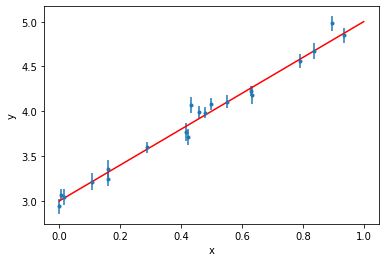

In [3]:


# Generate data
p_true = np.array([3.0,2.0])
npts = 20
x = np.random.rand(npts)
sigma = 0.05 + 0.05*np.random.rand(npts)
y = model(p_true,x) + sigma*np.random.randn(npts)

plt.figure()
plt.errorbar(x,y,sigma,fmt='.')
xx = np.linspace(0,1,101)
plt.plot(xx,model(p_true,xx),'r-')
plt.xlabel('x')
plt.ylabel('y')


-10.275750763192606
-15.736727351446593

R: [100. 100.]
alpha: [1. 1. 1. 1. 1.]

R: [2.38791692 1.44298081]
alpha: [1.1 1.1 1.1 1.1 1.1]

R: [1.17964164 1.05051866]
alpha: [1.21 1.21 1.21 1.21 1.21]

R: [1.02621817 1.00352044]
alpha: [1.331 1.331 1.331 1.331 1.331]


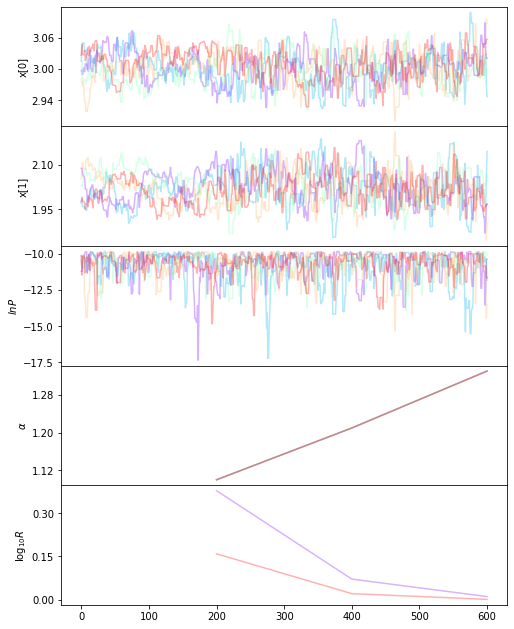

In [4]:

p_guess = np.array([3.05,2.05])
ndim = 2

print(ln_prob(p_true,x,y,sigma))
print(ln_prob(p_guess,x,y,sigma))


nchains = 5

sampler = Adaptive_Sampler(ndim=ndim,nchains=nchains,ln_prob_fn=ln_prob,sigma=0.02*np.ones(ndim),args=(x,y,sigma))

while np.max(sampler.R) > 1.1:
    sampler.iterate_chains(200,start=p_guess,plot_progress=False)
    print()
    print('R:',sampler.R)
    print('alpha:',sampler.alpha)


sampler.plot_chains(plot_to_file=False)




parameter means and uncertainties:
[(3.0036932652342427, 0.031496818270008387, 0.031991924021930185), (2.023115245383999, 0.06174857308044457, 0.060229189333083966)]


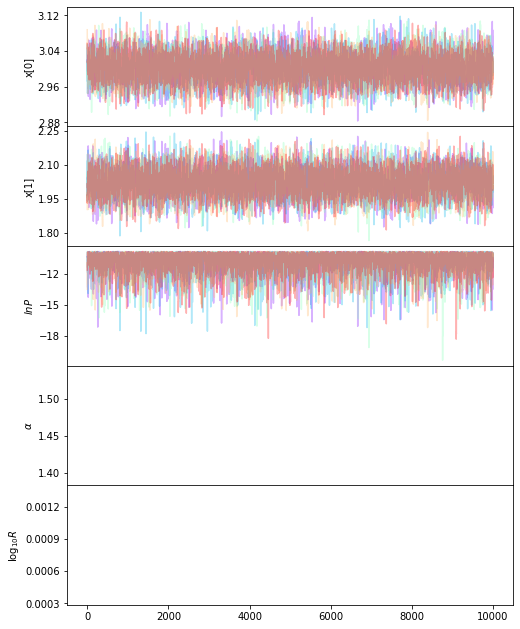

In [5]:
nsteps = 10000
sampler.reset()

sampler.plotprefix = 'test1-final'
sampler.iterate_chains(nsteps,start=p_guess,plot_progress=False)

sampler.plot_chains(plot_to_file=False)

params = list(map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]), \
            zip(*np.percentile(sampler.chains[-nsteps:,:,:].reshape(nsteps*nchains,ndim), \
            [16, 50, 84], axis=0))))

print('parameter means and uncertainties:')
print(params)

p_final = np.array([params[0][0],params[1][0]])


Text(0, 0.5, 'y')

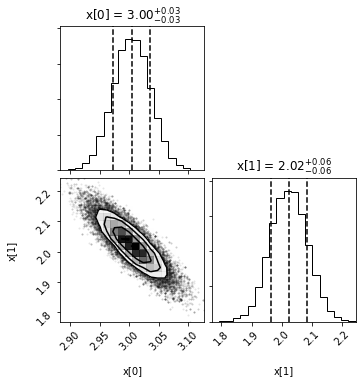

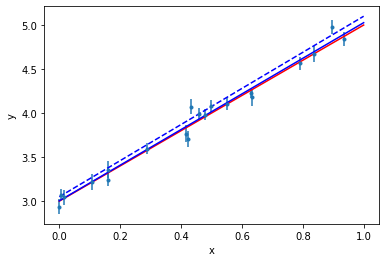

In [6]:

sampler.plot_chain_corner(nsteps=nsteps,plot_to_file=False)



plt.figure()
plt.errorbar(x,y,sigma,fmt='.')
xx = np.linspace(0,1,101)
plt.plot(xx,model(p_true,xx),'r-')
plt.plot(xx,model(p_guess,xx),'b--')
plt.plot(xx,model(p_final,xx),'b-')
plt.xlabel('x')
plt.ylabel('y')

